# Gaussian Mixture Models: the Notebook

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html

In this notebook, I have a few tasks for you to try out related to GMMs. Not much guidance is given here, but the things to do are pretty straightforward.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.

The mean(s) estimated with this 2 component GMM: 
[[ 0.18657016  2.6185963 ]
 [ 5.48908578  5.16722374]]


The covariances [SEE THE DOCS] estimated with this 2 component GMM: 
[[[ 6.73191617  0.63647953]
  [ 0.63647953  6.76229982]]

 [[ 2.89392043  1.70856496]
  [ 1.70856496  1.16233628]]]


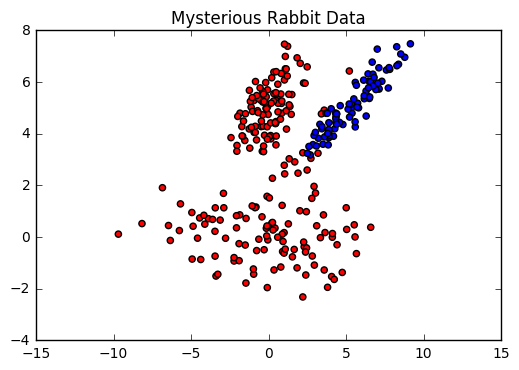

In [2]:
# data generation
np.random.seed(1)

covar = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

dat_threedee = np.vstack((np.random.multivariate_normal([1, 1, 1], covar, 250), 
                          np.random.multivariate_normal([1, 5, 1], covar, 250),
                          np.random.multivariate_normal([3, 2, 1], covar, 250)))

dat_twodee = np.vstack((np.random.multivariate_normal([0, 0], [[10, 0], [0, 1]], 100),
                        np.random.multivariate_normal([0, 5], [[1, 0.5], [0.5, 1]], 100),
                        np.random.multivariate_normal([5, 5], [[5, 3], [3, 2]], 100)))

dat_twodee_simple = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                               np.random.multivariate_normal([0, 5], [[1, 0], [0, 1]], 100),
                               np.random.multivariate_normal([5, 5], [[2, 0], [0, 2]], 100)))

dat_twodee_headache = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                                 np.random.multivariate_normal([0, 1], [[1, 0], [0, 1]], 100),
                                 np.random.multivariate_normal([1, 1], [[2, 0], [0, 2]], 100)))

comps = 2
gm_mod = GaussianMixture(n_components = comps)

gm_mod.fit(dat_twodee)
y_hat = gm_mod.predict(dat_twodee)

print "The mean(s) estimated with this", comps, "component GMM: \n", gm_mod.means_

print "\n\nThe covariances [SEE THE DOCS] estimated with this", comps, "component GMM: \n", gm_mod.covariances_ 

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
p = plt.subplot(1, 1, 1)
p.scatter(dat_twodee[:, 0], dat_twodee[:, 1], c=y_hat, cmap=cm_bright)
plt.title("Mysterious Rabbit Data")

In [8]:
gm_mod.means_[:,1]

array([ 2.6185963 ,  5.16722374])

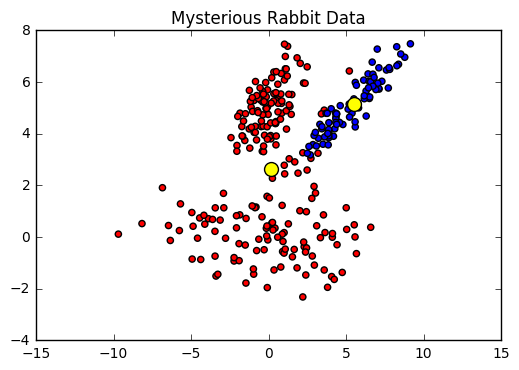

In [15]:
#Add means to the plot
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure()
p = plt.subplot(1, 1, 1)
p.scatter(dat_twodee[:, 0], dat_twodee[:, 1], c=y_hat, cmap=cm_bright)
p.scatter(gm_mod.means_[:,0], gm_mod.means_[:,1], c = "yellow", s= 100)
plt.title("Mysterious Rabbit Data")
plt.show()

## Common questions:
1. The two means of the estimated gaussian distributions are printed out, add them as points to the plot. Do their locations make sense to you?
2. The two covariance matrices are not the full matrices (since it is 2-D gaussian, this should be a 2x2 matrix). What are the full matrices? Construct them (they are not available directly as output from the GMM fit) and print them out. You can see what the method is giving by looking at the documentation for 'covars' in the GMM docs, look at the 'spherical' case, which is the default we are using here.

## Task 1: Covariance Structures, components, AIC / BIC

The goal of this question is to try out the flexibility of the class of GMM models, and to try out methods for choosing a model.

Use the data:

dat_twodee

1. Try out the different covariance structures, see the argument `covariance_type`  Plot the results.

2. Try out different numbers of components, see the argument `n_components` Plot the results.

3. Use BIC to find the best choice for the settings in (1) and (2), see the `BIC` function, an example appears below. What model did you find works best? What model would you expect to work best, given how we generated the data?

4. Try all of the above with dat_twodee_headache; what results do you see here?

Demo of BIC, a lower score relative to another model is better:
BIC = 2834.26086529


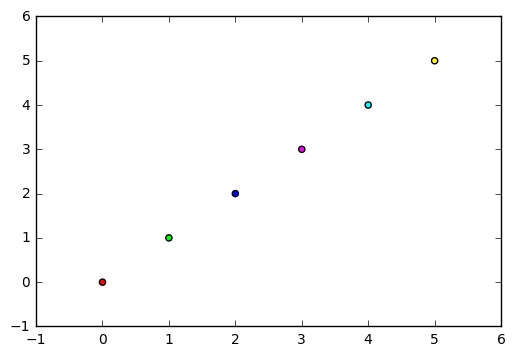

In [25]:
# demo of the BIC function
print "Demo of BIC, a lower score relative to another model is better:"
print "BIC =", gm_mod.bic(dat_twodee)

# demo for colors for up to 6 components so you can plot multiple component models
cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFFF00'])

p = plt.subplot(1, 1, 1)
p.scatter(range(6), range(6), c=range(6), cmap=cm_bright)


Demo of BIC, a lower score relative to another model is better:
BIC = 2834.26086529
Demo of BIC, a lower score relative to another model is better:
BIC = 2930.77938354
Demo of BIC, a lower score relative to another model is better:
BIC = 2834.45969137
Demo of BIC, a lower score relative to another model is better:
BIC = 2926.73308929


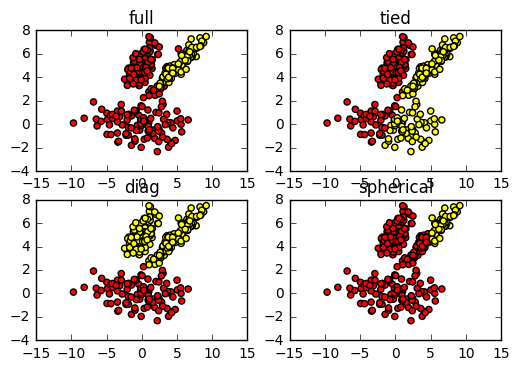

In [42]:
comps = 2

#put covariance types in a list
covariance_types = ['full', 'tied', 'diag', 'spherical']



for i in range(4):
    
    gm_mod = GaussianMixture(n_components = comps, covariance_type = covariance_types[i])

    #fit the model
    gm_mod.fit(dat_twodee)

    preds = gm_mod.predict(dat_twodee)

    # demo of the BIC function
    print "Demo of BIC, a lower score relative to another model is better:"
    print "BIC =", gm_mod.bic(dat_twodee)

    # demo for colors for up to 6 components so you can plot multiple component models
    cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFFF00'])

    p = plt.subplot(2, 2, i + 1)
    p.scatter(dat_twodee[:, 0], dat_twodee[:, 1], c=preds, cmap=cm_bright)
    plt.title(covariance_types[i])

Demo of BIC, a lower score relative to another model is better:
BIC = 2646.90220202
Demo of BIC, a lower score relative to another model is better:
BIC = 2793.30815246
Demo of BIC, a lower score relative to another model is better:
BIC = 2817.59144692
Demo of BIC, a lower score relative to another model is better:
BIC = 2852.39721737


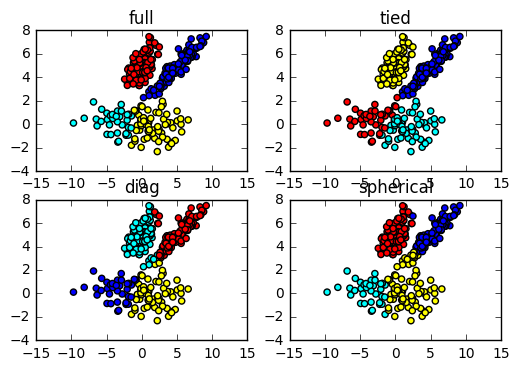

In [45]:
comps = 4

#put covariance types in a list
covariance_types = ['full', 'tied', 'diag', 'spherical']



for i in range(4):
    
    gm_mod = GaussianMixture(n_components = comps, covariance_type = covariance_types[i])

    #fit the model
    gm_mod.fit(dat_twodee)

    preds = gm_mod.predict(dat_twodee)

    # demo of the BIC function
    print "Demo of BIC, a lower score relative to another model is better:"
    print "BIC =", gm_mod.bic(dat_twodee)

    # demo for colors for up to 6 components so you can plot multiple component models
    cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFFF00'])

    p = plt.subplot(2, 2, i + 1)
    p.scatter(dat_twodee[:, 0], dat_twodee[:, 1], c=preds, cmap=cm_bright)
    plt.title(covariance_types[i])
    

## GMM vs Kmeans vs Agglomerative Clustering

The goal of this question is to directly compare GMMs to other clustering techniques, and get an intuitive sense of the differences.

Links to docs for kmeans and agglomerative clustering:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

Use the data:

dat_twodee

1. Compare the results you see with GaussianMixture, KMeans, and AgglomerativeClustering -- use all the three linkage types. Some demos are provided below. Try different numbers of clusters for all these algorithms. What differences do you see between the methods? Which one would you recommend using? Don't worry about trying to numerically score the models here, just use plots and your visual judgement.

2. Try this again with the data: dat_twodee_simple and dat_twodee_headache; do you see any differences?

In [ ]:
# Solution code goes here!

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFFF00'])

def Proc():
    # define this function to take in the number of clusters
    plt.figure(figsize=(20, 4))
    
    p = plt.subplot(1, 5, 1)
    p.scatter(range(6), range(6), c=range(6), cmap=cm_bright)
    plt.title('KMeans')
    
    p = plt.subplot(1, 5, 2)
    p.scatter(range(6), range(6), c=range(6), cmap=cm_bright)
    plt.title('GaussianMixture') 
    
    p = plt.subplot(1, 5, 3)
    p.scatter(range(6), range(6), c=range(6), cmap=cm_bright)
    plt.title('Agglomerative') 
    
    p = plt.subplot(1, 5, 4)
    p.scatter(range(6), range(6), c=range(6), cmap=cm_bright)
    plt.title('Agglomerative') 
    
    p = plt.subplot(1, 5, 5)
    p.scatter(range(6), range(6), c=range(6), cmap=cm_bright)
    plt.title('Agglomerative') 

Proc()

## Generating and fitting data for GMMs

The goal of this question is to see how GMMs do at recovering parameters. That is, if the data really came from a certain GMM, when and how well can we figure that out?

Build off of the data generation code given below (particularly for 1) and the data generation code in the common section at the top.

1. Make a function that generates spherical data for an arbitrary number of components and dimensions. This should have three arguments: a number of draws per component, a single scalar variance for all components and a matrix of means for the components. Try fitting a GMM with the appropriate number of components: can you recover the means? Try increasing the variance / separation of the cluster centers, can you recover the means?

2. Generate data that is more appropriate for other `covariance_type` settings: focus on diag and full. **Do this in only two dimensions, more dimensions will be a bit of a pain to visualize**. Plot the generated data, run GMMs and see how well you can recover the _mean_ and _variance_ of each component. You only need to use 2 or 3 components here.

NOTE: in all of the above, you may fit GMMs pretending you know the number of components (not really like real life...)

In [ ]:
# some example code for generating data...
draws_per_comp = 5
variance = 1
means = np.array([[0, 0], [10, 10], [10, -10]])

GMM()

print means.shape

covar = np.diag([variance for i in range(means.shape[1])])

gen_dat = np.vstack([np.random.multivariate_normal(means[i, :], covar, draws_per_comp) for i in range(means.shape[0])])

gm_mod = GaussianMixture(n_components=3)

gm_mod.fit(gen_dat)

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
p = plt.subplot(1, 3, 1)
p.scatter(gen_dat[:, 0], gen_dat[:, 1], c=gm_mod.predict(gen_dat), cmap=cm_bright)
plt.title('GMM generated data') 